In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv('population.csv')

In [4]:
data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POP,TOT,AGRWTH,A,1957,2.270316,NaN
1,AUS,POP,TOT,AGRWTH,A,1958,2.095436,NaN
2,AUS,POP,TOT,AGRWTH,A,1959,2.174355,NaN
3,AUS,POP,TOT,AGRWTH,A,1960,2.177804,NaN
4,AUS,POP,TOT,AGRWTH,A,1961,2.269586,NaN


In [5]:
df = data[['LOCATION','TIME','Value']]

In [6]:
df.head()

,LOCATION,TIME,Value
0,AUS,1957,2.270316
1,AUS,1958,2.095436
2,AUS,1959,2.174355
3,AUS,1960,2.177804
4,AUS,1961,2.269586


In [7]:
from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()

In [8]:
lc.fit(df['LOCATION'])

LabelEncoder()

In [9]:
TIME = lc.transform(df['LOCATION'])

In [10]:
TIME

array([ 0,  0,  0, ..., 29, 29, 29])

In [11]:
df['Country'] = TIME

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df.head()

,LOCATION,TIME,Value,Country
0,AUS,1957,2.270316,0
1,AUS,1958,2.095436,0
2,AUS,1959,2.174355,0
3,AUS,1960,2.177804,0
4,AUS,1961,2.269586,0


In [13]:
df.drop(['LOCATION'],axis=1,inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
df.drop(['Year'],axis=1,inplace=True)

KeyError: "['Year'] not found in axis"

In [15]:
df.head()

,TIME,Value,Country
0,1957,2.270316,0
1,1958,2.095436,0
2,1959,2.174355,0
3,1960,2.177804,0
4,1961,2.269586,0


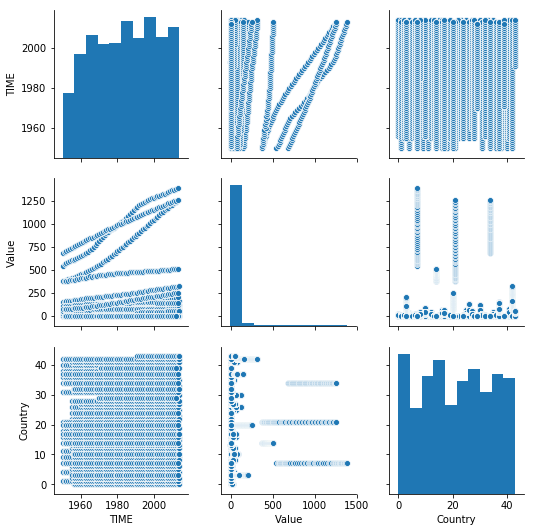

In [16]:
sns.pairplot(df)

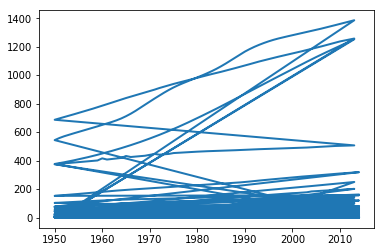

In [17]:
plt.plot(df['TIME'],df['Value'],linewidth=2.0)

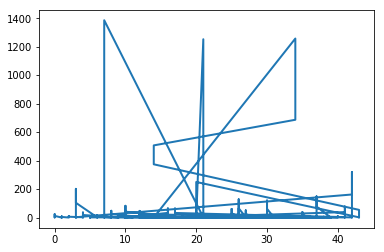

In [18]:
plt.plot(df['Country'],df['Value'],linewidth=2.0)

In [19]:
X = df.drop(['Value'],axis=1)
y = df['Value'].to_numpy()

In [20]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(X)
#normalized_y = preprocessing.normalize(y.reshape(-1,1))

In [ ]:
normalized_X

In [ ]:
normalized_y

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state=101)


In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [23]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
predictions = lm.predict(X_test)

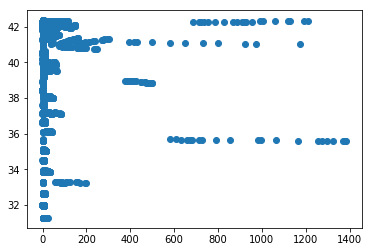

In [25]:
plt.scatter(y_test,predictions)

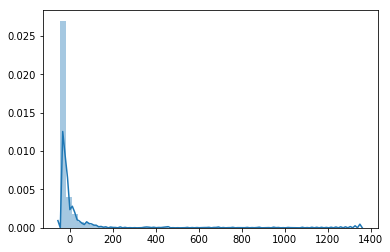

In [26]:
sns.distplot((y_test-predictions),bins=50);

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 52.57105939416919
MSE: 17356.46616541629
RMSE: 131.74394166494446
